In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import scipy.optimize as spo
import seaborn as sns

### Functions

#### Data

In [18]:
def PCA():
    pc1 = np.loadtxt("Data/PC_hyperspectral_1.txt")
    pc2 = np.loadtxt("Data/PC_hyperspectral_2.txt")
    pc3 = np.loadtxt("Data/PC_hyperspectral_3.txt")
    
    return pc1, pc2, pc3

In [19]:
def Sens_curves(option_opsins):
    
    if option_opsins==0:
        ##### Raw opsin responses
        N_points = 13
        raw = np.loadtxt("Data/Opsins_raw.txt")
        idx = np.array(np.linspace(0,raw[0,:].size-1, N_points),dtype=int)
        return raw[-1,idx], raw[0,idx], raw[1,idx], raw[2,idx], raw[3,idx]
        
    if option_opsins==1:
        ##### Fitted opsin responses HC-blocked
        N_points = 13
        fit = np.loadtxt("Data/Opsins_fit.txt")
        idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
        return fit[-1,idx], fit[0,idx], fit[1,idx], fit[2,idx], fit[3,idx]
    
    if option_opsins==2:
        ##### Functional opsin curves
        Red_ops = np.loadtxt("Data/Functional_trace_OpsinR.txt")
        Green_ops = np.loadtxt("Data/Functional_trace_OpsinG.txt")
        Blue_ops = np.loadtxt("Data/Functional_trace_OpsinB.txt")
        UV_ops = np.loadtxt("Data/Functional_trace_OpsinU.txt")
        l_array = np.loadtxt("Data/Functional_trace_Opsin_wavelength.txt")
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
    
        return np.flip(l_array), (Red_mean), (Green_mean), (Blue_mean), (UV_mean)
    

#### Pure inhibitory network - 1HC

In [46]:
def cost_function_tri(params, Wparams):
    hr, hg, hb = params[0], params[1], params[2]
    Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, Ir, Ig, Ib, rr, gg, bb = Wparams
    beta_ex = 1
    beta_inh = 1
    
    R_eq = -hr + rr*Ir + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wrg*np.tanh(beta_ex*hg) + Wrb*np.tanh(beta_ex*hb) + (Wrh + Wrg + Wrb)
    G_eq = -hg + gg*Ig + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wgr*np.tanh(beta_ex*hr) + Wgb*np.tanh(beta_ex*hb) + (Wgh + Wgr + Wgb)
    B_eq = -hb + bb*Ib + Wbh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wbr*np.tanh(beta_ex*hr) + Wbg*np.tanh(beta_ex*hg) + (Wbh + Wbr + Wbg)
    
    return np.sqrt((R_eq)**2 + (G_eq)**2 + (B_eq)**2 )

In [53]:
def cost_function_inh_trichro(W, Wparams):
    
    Wrh = W[0]
    Whr = W[1]
    Wgh = W[2]
    Whg = W[3]
    Wbh = W[4]
    Whb = W[5]
    rr = W[6]
    gg = W[7]
    bb = W[8]
    
    Wrg, Wrb, Wgb = Wparams
    
    beta_ex = 1
    beta_inh = 1
    
    h1 = -h1_true + rr*IR + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_true) + (Whr+Whg+Whb) ) ) + Wrg*np.tanh(beta_ex*h2_true) + Wrb*np.tanh(beta_ex*h3_true) + (Wrh + Wrg + Wrb)
    h2 = -h2_true + gg*IG + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_true) + (Whr+Whg+Whb) ) ) + Wgr*np.tanh(beta_ex*h1_true) + Wgb*np.tanh(beta_ex*h3_true) + (Wgh + Wgr + Wgb)
    h3 = -h3_true + bb*IB + Wbh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_true) + (Whr+Whg+Whb) ) ) + Wbr*np.tanh(beta_ex*h1_true) + Wbg*np.tanh(beta_ex*h2_true) + (Wbh + Wbr + Wbg)
    
    return np.sqrt(np.sum((h1)**2) + np.sum((h2)**2) + np.sum((h3)**2))

In [48]:
def hr_hg_hb_inh(Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, rr, gg, bb):
    h1, h2, h3 = np.zeros(IR.size), np.zeros(IR.size), np.zeros(IR.size)
    for ii in range(IR.size):
        Ir = IR[ii]  
        Ig = IG[ii]
        Ib = IB[ii]
        Wparams = np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, Ir, Ig, Ib, rr, gg, bb])
        counter = -1
        wh_ite = 0
        while(wh_ite == 0):
            counter += 1
            params = np.random.normal(0,1,3)
            result = spo.minimize(cost_function_tri, params, args = Wparams)
            if result.fun<0.1:     
                h1[ii] = np.round(result.x[0], decimals=1)
                h2[ii] = np.round(result.x[1], decimals=1)
                h3[ii] = np.round(result.x[2], decimals=1)
                wh_ite = 1
            if counter > 20:
                print("Problem")
                h1[ii] = np.nan
                h2[ii] = np.nan
                h3[ii] = np.nan
                wh_ite = 1
    return h1, h2, h3

#### Excitatory/inhibitory network 1HC

In [58]:
def cost_function_tri_ex(params, Wparams): # With Wrg = wgr, etc
    hr, hg, hb = params[0], params[1], params[2]
    Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, Ir, Ig, Ib, rr, gg, bb = Wparams
    beta_ex = 1
    beta_inh = 1
    
    R_eq = -hr + rr*Ir + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wrg*np.tanh(beta_ex*hg) + Wrb*np.tanh(beta_ex*hb) + (Wrh + Wrg + Wrb)
    G_eq = -hg + gg*Ig + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wrg*np.tanh(beta_ex*hr) + Wgb*np.tanh(beta_ex*hb) + (Wgh + Wrg + Wgb)
    B_eq = -hb + bb*Ib + Wbh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wrb*np.tanh(beta_ex*hr) + Wgb*np.tanh(beta_ex*hg) + (Wbh + Wrb + Wgb)
    
    return np.sqrt((R_eq)**2 + (G_eq)**2 + (B_eq)**2 )

In [86]:
def cost_function_ex_trichro(W):
    
    Wrh = W[0]
    Whr = W[1]
    Wgh = W[2]
    Whg = W[3]
    Wbh = W[4]
    Whb = W[5]
    Wrg = W[6] # I directly change Wgr -> Wrg
    Wrb = W[7]
    Wgb = W[8]
    rr = W[9]
    gg = W[10]
    bb = W[11] 
    
    beta_ex = 1
    beta_inh = 1
    
    h1 = -h1_true + IR + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_true) + (Whr+Whg+Whb) ) ) + Wrg*np.tanh(beta_ex*h2_true) + Wrb*np.tanh(beta_ex*h3_true) + (Wrh + Wrg + Wrb)
    h2 = -h2_true + IG + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_true) + (Whr+Whg+Whb) ) ) + Wgr*np.tanh(beta_ex*h1_true) + Wgb*np.tanh(beta_ex*h3_true) + (Wgh + Wgr + Wgb)
    h3_ = -h3_true + IB + Wbh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_true) + (Whr+Whg+Whb) ) ) + Wbr*np.tanh(beta_ex*h1_true) + Wbg*np.tanh(beta_ex*h2_true) + (Wbh + Wbr + Wbg)
    
    return np.sqrt(np.sum((h1)**2) + np.sum((h2)**2) + np.sum((h3)**2))
    


In [60]:
def hr_hg_hb_ex(Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, rr, gg, bb):
    h1, h2, h3 = np.zeros(IR.size), np.zeros(IR.size), np.zeros(IR.size)
    for ii in range(IR.size):
        Ir = IR[ii]  
        Ig = IG[ii]
        Ib = IB[ii]
        Wparams = np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, Ir, Ig, Ib, rr, gg, bb])
        counter = -1
        wh_ite = 0
        while(wh_ite == 0):
            counter += 1
            params = np.random.normal(0,1,3)
            result = spo.minimize(cost_function_tri_ex, params, args = Wparams)
            if result.fun<0.1:     
                h1[ii] = np.round(result.x[0], decimals=1)
                h2[ii] = np.round(result.x[1], decimals=1)
                h3[ii] = np.round(result.x[2], decimals=1)
                wh_ite = 1
            if counter > 20:
                print("Problem Plot")
                h1[ii] = np.nan
                h2[ii] = np.nan
                h3[ii] = np.nan
                wh_ite = 1
    return h1, h2, h3


#### Pure inhibitory network - 2HC

In [10]:
def cost_function_tri_inh_2HC(params, Wparams):
    hr, hg, hb_ = params[0], params[1], params[2]
    Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, Ir, Ig, Ib, rr, gg, bb, hb = Wparams
    beta_ex = 1
    beta_inh = 1
    
    R_eq = -hr + Ir + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wrg*np.tanh(beta_ex*hg) + Wrb*np.tanh(beta_ex*hb) + (Wrh + Wrg + Wrb)
    G_eq = -hg + Ig + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wgr*np.tanh(beta_ex*hr) + Wgb*np.tanh(beta_ex*hb) + (Wgh + Wgr + Wgb)
    B_eq = -hb + Ib + Wbh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + Whb*np.tanh(beta_ex*hb) + (Whr+Whg+Whb) ) ) + Wbr*np.tanh(beta_ex*hr) + Wbg*np.tanh(beta_ex*hg) + (Wbh + Wbr + Wbg)
    B_eq_ = -hb_ + bb*hb + rr*(np.tanh(hr)+1) + gg*(np.tanh(hg)+1)
    
    return np.sqrt((R_eq)**2 + (G_eq)**2 + (B_eq)**2 + (B_eq_)**2)

In [11]:
def cost_function_inh_trichro_2HC(W, Wparams):
    
    h3_array = np.ones(13)
    Wrh = W[0]
    Whr = W[1]
    Wgh = W[2]
    Whg = W[3]
    Wbh = W[4]
    Whb = W[5]
    rr = W[6]
    gg = W[7]
    bb = W[8] 
    h3_array = W[9:]
    Wrg, Wgr, Wrb, Wbr, Wgb, Wbg = Wparams
    
    beta_ex = 1
    beta_inh = 1
    
    h1 = -h1_true + IR + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_array) + (Whr+Whg+Whb) ) ) + Wrg*np.tanh(beta_ex*h2_true) + Wrb*np.tanh(beta_ex*h3_array) + (Wrh + Wrg + Wrb)
    h2 = -h2_true + IG + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_array) + (Whr+Whg+Whb) ) ) + Wgr*np.tanh(beta_ex*h1_true) + Wgb*np.tanh(beta_ex*h3_array) + (Wgh + Wgr + Wgb)    
    h3 = -h3_array + IB + Wbh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*h1_true) + Whg*np.tanh(beta_ex*h2_true) + Whb*np.tanh(beta_ex*h3_array) + (Whr+Whg+Whb) ) ) + Wbr*np.tanh(beta_ex*h1_true) + Wbg*np.tanh(beta_ex*h2_true) + (Wbh + Wbr + Wbg)
    h3_ = -h3_true + bb*h3_array + rr*(np.tanh(h1_true)+1) + gg*(np.tanh(h2_true)+1)
    
    return np.sqrt(np.sum((h1)**2) + np.sum((h2)**2) + np.sum((h3_)**2) + np.sum((h3)**2) )


In [12]:
def hr_hg_hb_inh_2HC(Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, rr, gg, bb, h3_fin):
    h1, h2, h3 = np.zeros(IR.size), np.zeros(IR.size), np.zeros(IR.size)
    for ii in range(IR.size):
        Ir = IR[ii]  
        Ig = IG[ii]
        Ib = IB[ii]
        hb = h3_fin[ii]
        Wparams = np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, Ir, Ig, Ib, rr, gg, bb, hb])
        counter = -1
        wh_ite = 0
        while(wh_ite == 0):
            counter += 1
            params = np.random.normal(0,1,3)
            result = spo.minimize(cost_function_tri_inh_2HC, params, args = Wparams)
            if result.fun<0.5:     
                h1[ii] = np.round(result.x[0], decimals=1)
                h2[ii] = np.round(result.x[1], decimals=1)
                h3[ii] = np.round(result.x[2], decimals=1)
                wh_ite = 1
            if counter > 20:
                print("Problem Plot", result.fun)
                h1[ii] = np.nan
                h2[ii] = np.nan
                h3[ii] = np.nan
                wh_ite = 1
    return h1, h2, h3

### Main

#### General Parameters

In [20]:
Param_string = 1
string = ['FuncionalOpsins', 'PCA', 'mixed']

if Param_string == 1:
    h1_true_, h2_true_, h3_true_= PCA()
    h1_true = h1_true_[1,:]
    h2_true = h2_true_[1,:]
    h3_true = h3_true_[1,:]
    option_opsins = 2
    _, _, _, h3_true_, _ = Sens_curves(option_opsins)
    L_ = h1_true_[0,:]
if Param_string == 0:
    option_opsins = 2
    L_, h1_true, h2_true, h3_true, _ = Sens_curves(option_opsins)
if Param_string == 2:
    h1_true_, h2_true_, _ = PCA()
    h1_true = h1_true_[1,:]
    h2_true = h2_true_[1,:]
    L_ = h1_true_[0,:]
    option_opsins = 2
    _, _, _, h3_true, _ = Sens_curves(option_opsins)
    
option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
L, IR, IG, IB, IU = Sens_curves(option_opsins) # Red and Green combination

par_connections = 2 # 0: inhibitorry, 1: mixed, 2: inhibitory with 2HC  

#### Pure inhibitory network 1HC

In [ ]:
par_connections = 0
if par_connections==0:
    N_trials = 20    
    hr_learned = 0
    hg_learned = 0
    hb_learned = 0
    L_array = 0
    Params = 0
    bnds=((-10, -0.1), (0.1,10), (-10, -0.1), (0.1,10), (-10, -0.1), (0.1,10), (0.1,10), (0.1,10), (0.1, 10))
    counter_learn = 0
    for trials in range(N_trials):
        err = 0
        counter_while = -1
        while err == 0:
#             Wrh, Whr, Wgh, Whg, Wbh, Whb = np.zeros(6)
            rr, gg, bb = np.ones(3)
            Wrh, Whr, Wgh, Whg, Wbh, Whb = 2*np.random.random(6)
            Wrh = -Wrh
            Wgh = -Wgh
            Wbh = -Wbh
            Wrg, Wrb, Wgb, Wgr, Wbr, Wbg = np.zeros(6)
            Wparams = np.array([Wrg, Wgr, Wrb, Wbr, Wgb, Wbg])
            W_init=np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, rr, gg, bb])
            counter_while += 1 
#             result=spo.minimize(cost_function_inh_trichro, W_init,args = Wparams) #options={'disp':True}
            result=spo.minimize(cost_function_inh_trichro, W_init, bounds=bnds, args = Wparams) #options={'disp':True}
            if result.fun<2:
                counter_learn += 1 
                print("*****************FINAL**********************")
                print(f"x={np.array(result.x)} y={result.fun}")
                print("***************************************")
                Wrh, Whr, Wgh, Whg, Wbh, Whb, rr, gg, bb = np.array(result.x)
                hr_learned_, hg_learned_, hb_learned_ = hr_hg_hb_inh(Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, rr, gg, bb)

                hr_learned = np.append(hr_learned, hr_learned_)
                hg_learned = np.append(hg_learned, hg_learned_)
                hb_learned = np.append(hb_learned, hb_learned_)
                L_array = np.append(L_array, L)

                Params = np.append(Params, np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, rr, gg, bb]))
                err = 1
            if counter_while >10:
                err = 1
                print("Not learned")
    Params = np.reshape(Params[1:], (counter_learn, 9))
#     np.savetxt("Data/Modified/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", L_array)
#     np.savetxt("Data/Modified/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hr_learned)
#     np.savetxt("Data/Modified/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hg_learned)
#     np.savetxt("Data/Modified/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hb_learned)
#     np.savetxt("Data/Modified/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", L)
#     np.savetxt("Data/Modified/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h1_true)
#     np.savetxt("Data/Modified/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h2_true)
#     np.savetxt("Data/Modified/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h3_true)
#     np.savetxt("Data/Modified/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", Params)

#### Inhibitory/Excitatory networks 1HC

In [26]:
#################################### ONLY EXCITATORY ####################################

if par_connections==1:
    N_trials = 20    
    hr_learned = 0
    hg_learned = 0
    hb_learned = 0
    L_array = 0
    Params = 0
    bnds=((-10, -0.1), (0.1,10), (-10, -0.1), (0.1,10), (-10, -0.1), (0.1,10), (0,10), (0,10), (0,10), (0.1,10), (0.1,10), (0.1, 10))
    for trials in range(N_trials):
        err = 0
        counter_while = -1
        while err == 0:
            rr, gg, bb = np.ones(3)
            Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb = 2*np.random.random(9)
            Wrh = -Wrh
            Wgh = -Wgh
            Wbh = -Wbh
#             Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, rr, gg, bb = np.zeros(12)            

            W_init=np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, rr, gg, bb])
            counter_while += 1 
            result=spo.minimize(cost_function_ex_trichro, W_init, bounds=bnds) #options={'disp':True}
            if result.fun<3:
                print("***************************************")
                print(f"x={np.array(result.x)} y={result.fun}")
                print("***************************************")
                Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, rr, gg, bb = np.array(result.x)
                Wgr, Wbr, Wbg = Wrg, Wrb, Wgb
                hr_learned_, hg_learned_, hb_learned_ = hr_hg_hb_ex(Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, rr, gg, bb)

                hr_learned = np.append(hr_learned, hr_learned_)
                hg_learned = np.append(hg_learned, hg_learned_)
                hb_learned = np.append(hb_learned, hb_learned_)
                L_array = np.append(L_array, L)

                Params = np.append(Params, np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wrb, Wgb, rr, gg, bb]))
                err = 1
            if counter_while >10:
                err = 1
                print("Not learned")
                
# # Params = np.reshape(Params[1:], (N_trials, 6))
# # np.savetxt("Data/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", L_array)
# # np.savetxt("Data/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hr_learned)
# # np.savetxt("Data/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hg_learned)
# # np.savetxt("Data/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hb_learned)
# # np.savetxt("Data/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", L)
# # np.savetxt("Data/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h1_true)
# # np.savetxt("Data/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h2_true)
# # np.savetxt("Data/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h3_true)
# # np.savetxt("Data/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", Params)



#### Pure inhibitory network 2HC

In [21]:
if par_connections==2:
    N_trials = 10    
    hr_learned = 0
    hg_learned = 0
    hb_learned = 0
    hb_learned2 = 0
    L_array = 0
    Params = 0
    bnds=((-10, -0.1), (0.1,10), (-10, -0.1), (0.1,10), (-10, -0.1), (0.1,10), (-10, 0), (-10, 0), (0, 10), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1))
    counter_learn = 0
    for trials in range(N_trials):
        err = 0
        counter_while = -1
        while err == 0:
            Wrh, Whr, Wgh, Whg, Wbh, Whb, rr, gg, bb = 2*np.random.random(9)
            h3_init = 0.5*np.ones(13)
            Wrh = -Wrh
            Wgh = -Wgh
            Wbh = -Wbh
            rr, gg, bb = -rr, -gg, bb
            Wrg, Wrb, Wgb, Wgr, Wbr, Wbg = np.zeros(6)
            Wparams = np.array([Wrg, Wgr, Wrb, Wbr, Wgb, Wbg])
            W_init=np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, rr, gg, bb, h3_init[0], h3_init[1], h3_init[2], h3_init[3], h3_init[4], h3_init[5], h3_init[6], h3_init[7], h3_init[8], h3_init[9], h3_init[10], h3_init[11], h3_init[12]])
            counter_while += 1 
            result=spo.minimize(cost_function_inh_trichro_2HC, W_init, bounds=bnds, args = Wparams) #options={'disp':True}
            if result.fun < 5:
                counter_learn += 1 
#                 print("*****************FINAL**********************")
#                 print(f"x={np.array(result.x)} y={result.fun}")
#                 print("***************************************")
                h3_fin = np.ones(13)
                Wrh, Whr, Wgh, Whg, Wbh, Whb, rr, gg, bb, h3_fin[0], h3_fin[1], h3_fin[2], h3_fin[3], h3_fin[4], h3_fin[5], h3_fin[6], h3_fin[7], h3_fin[8], h3_fin[9], h3_fin[10], h3_fin[11], h3_fin[12] = np.array(result.x)
                hr_learned_, hg_learned_, hb_learned_ = hr_hg_hb_inh_2HC(Wrh, Whr, Wgh, Whg, Wbh, Whb, Wrg, Wgr, Wrb, Wbr, Wgb, Wbg, rr, gg, bb, h3_fin)

                hr_learned = np.append(hr_learned, hr_learned_)
                hg_learned = np.append(hg_learned, hg_learned_)
                hb_learned = np.append(hb_learned, hb_learned_)
                L_array = np.append(L_array, L)

                Params = np.append(Params, np.array([Wrh, Whr, Wgh, Whg, Wbh, Whb, rr, gg, bb]))
                err = 1
            if counter_while > 10:
                err = 1
                print("Not learned")
    Params = np.reshape(Params[1:], (counter_learn, 9))
#     np.savetxt("Data/Modified/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", L_array)
#     np.savetxt("Data/Modified/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hr_learned)
#     np.savetxt("Data/Modified/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hg_learned)
#     np.savetxt("Data/Modified/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", hb_learned)
#     np.savetxt("Data/Modified/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", L)
#     np.savetxt("Data/Modified/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h1_true)
#     np.savetxt("Data/Modified/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h2_true)
#     np.savetxt("Data/Modified/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", h3_true)
#     np.savetxt("Data/Modified/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt", Params)

*****************FINAL**********************
x=[-0.1         3.1244272  -0.20690143  2.06205319 -0.1         1.34793755
  0.         -0.51716564  2.54010784  0.67302758  0.5831969   0.5221675
  0.50299203  0.38429547  0.26933052  0.15165985  0.04175745 -0.02538648
  0.03033028  0.13727792  0.1752166   0.19386429] y=1.9104134898467346
***************************************
*****************FINAL**********************
x=[-0.1         0.1        -0.29108607  0.1        -0.1         0.1
  0.         -0.68440191  2.75620265  0.71829404  0.62835175  0.57028896
  0.56203477  0.45453411  0.34824444  0.23049013  0.09700244  0.01017284
  0.05743504  0.15872913  0.19607736  0.21192412] y=1.844342195008884
***************************************
*****************FINAL**********************
x=[-0.1         3.50067908 -0.20689655  1.75607415 -0.1         2.16224977
  0.         -0.51713387  2.54047511  0.67293309  0.58309657  0.52206186
  0.50289075  0.3842137   0.26926895  0.15162088  0.04174832 -

### Plots from data cluster

In [30]:
def Load_data_fig2(Param_string, Combination):
    string = ['FuncionalOpsins', 'PCA']
    Colors = ['purple', 'olive', 'deeppink', 'dodgerblue', 'orangered']

    par_connections = 0
    L_array = np.loadtxt("Data/Cluster/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hr_learned= np.loadtxt("Data/Cluster/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hg_learned= np.loadtxt("Data/Cluster/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    L = np.loadtxt("Data/Cluster/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h1_true = np.loadtxt("Data/Cluster/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h2_true = np.loadtxt("Data/Cluster/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    Params = np.loadtxt("Data/Cluster/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")

    par_connections = 1
    L_array_ = np.loadtxt("Data/Cluster/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hr_learned_ = np.loadtxt("Data/Cluster/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hg_learned_ = np.loadtxt("Data/Cluster/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    L_ = np.loadtxt("Data/Cluster/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h1_true_ = np.loadtxt("Data/Cluster/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h2_true_ = np.loadtxt("Data/Cluster/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    Params_ = np.loadtxt("Data/Cluster/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    
    return L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_

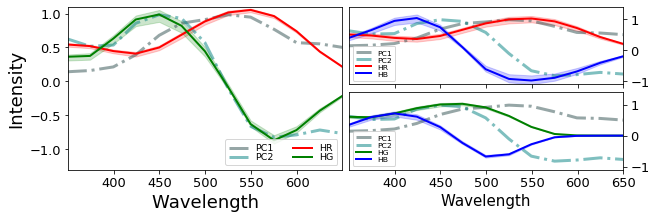

In [35]:
#--- Dichromatic networks

string = ['FuncionalOpsins', 'PCA']

fig = plt.figure(figsize=(15,3))
grid = plt.GridSpec(2, 6, wspace = 0.05 , hspace = 0.1)
p1 = fig.add_subplot(grid[:,:2])
p11 = fig.add_subplot(grid[0,2:4])
p12 = fig.add_subplot(grid[1,2:4])

#----------------
Param_string = 1

Combination = 0
L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
hr_learned = 1.4*hr_learned
hg_learned = 1.6*hg_learned
hr_learned_ = 1.4*hr_learned_
hg_learned_ = 1.6*hg_learned_

p1.plot(L, h1_true,color='darkslategray', linestyle='-.', linewidth = 3, label='PC1', alpha=0.5)
p1.plot(L, h2_true,color='teal', linestyle='-.', linewidth = 3, label='PC2', alpha=0.5)
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='red', ax=p1, label='HR', linewidth = 2)
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='green', ax=p1, label='HG', linewidth = 2)

Combination = 1
L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
hr_learned = 1.4*hr_learned
hg_learned = 1.6*hg_learned
hr_learned_ = 1.4*hr_learned_
hg_learned_ = 1.6*hg_learned_

p11.plot(L, h1_true,color='darkslategray', linestyle='-.', linewidth = 3, label='PC1', alpha=0.5)
p11.plot(L, h2_true,color='teal', linestyle='-.', linewidth = 3, label='PC2', alpha=0.5)
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='r', ax=p11, label='HR', linewidth = 2)
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='b', ax=p11, label='HB', linewidth = 2)

Combination = 2
L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
hr_learned = 1.4*hr_learned
hg_learned = 1.6*hg_learned
hr_learned_ = 1.4*hr_learned_
hg_learned_ = 1.6*hg_learned_

p12.plot(L, h1_true,color='darkslategray', linestyle='-.', linewidth = 3, label='PC1', alpha=0.5)
p12.plot(L, h2_true,color='teal', linestyle='-.', linewidth = 3, label='PC2', alpha=0.5)
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='g', ax=p12, label='HG', linewidth = 2)
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='b', ax=p12, label='HB', linewidth = 2)

p11.yaxis.tick_right()
p12.yaxis.tick_right()
p1.set_xlim(350.1, 649)
p11.set_xlim(350.1, 650)
p12.set_xlim(350.1, 650)
p1.set_ylim(-1.3, 1.1)
p11.set_ylim(-1.1, 1.4)
p12.set_ylim(-1.1, 1.4)
p1.tick_params(labelsize=13)
p11.tick_params('y', labelsize=13)
p12.tick_params('y', labelsize=13)
p11.tick_params('x', labelsize=13)
p12.tick_params('x', labelsize=13)
p1.set_xlabel("Wavelength", fontsize='18')
p11.set_xlabel("Wavelength", fontsize='15')
p12.set_xlabel("Wavelength", fontsize='15')
p1.set_ylabel("Intensity", fontsize='18')
p11.set_xticklabels([])
p1.legend(fontsize='9.5',loc=4, ncol=2, handleheight=0.2, labelspacing=0.006)
p11.legend(fontsize='7.7', loc=3, ncol=1,handleheight=1, labelspacing=0.006)
p12.legend(fontsize='7.7', loc=3, ncol=1, handleheight=1, labelspacing=0.006)

# plt.savefig("Plots/Dicho_Fit_pca+opsins_allcombinations.pdf")



In [36]:
#-- Trichromatic networks

from mpl_toolkits import mplot3d
x = np.arange(0.1, 2., 0.1)
y = np.arange(0.1, 2., 0.1)
z = np.arange(0.1, 2., 0.1)
N = x.size

X, Y = np.meshgrid(x, y)
Matrix = np.zeros((N,N,N))
for j in range(N):
    idx_params = np.array(np.loadtxt("Data/Cluster/idx_params_trichro_matrix_WRG_"+str(np.round(z[j], decimals=1))+".txt"),dtype=int)
    for i in range(idx_params.shape[0]):
        Matrix[j, idx_params[i,0], idx_params[i,1]] = 1

Matrix_sum = np.sum(np.flip(Matrix, axis=1), axis=0)       

#--------------------------------------
string = ['FuncionalOpsins', 'PCA', 'mixed']
Colors = ['purple', 'olive', 'deeppink', 'dodgerblue', 'orangered']

Param_string = 1
par_connections = 0
L_array = np.loadtxt("Data/Cluster/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hr_learned= np.loadtxt("Data/Cluster/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hg_learned= np.loadtxt("Data/Cluster/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hb_learned= np.loadtxt("Data/Cluster/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
L = np.loadtxt("Data/Cluster/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h1_true = np.loadtxt("Data/Cluster/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h2_true = np.loadtxt("Data/Cluster/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h3_true = np.loadtxt("Data/Cluster/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
Params = np.loadtxt("Data/Cluster/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")

par_connections = 1
L_array_ = np.loadtxt("Data/Cluster/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hr_learned_ = np.loadtxt("Data/Cluster/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hg_learned_ = np.loadtxt("Data/Cluster/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hb_learned_ = np.loadtxt("Data/Cluster/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
L_ = np.loadtxt("Data/Cluster/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h1_true_ = np.loadtxt("Data/Cluster/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h2_true_ = np.loadtxt("Data/Cluster/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h3_true_ = np.loadtxt("Data/Cluster/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
Params_ = np.loadtxt("Data/Cluster/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")


#------------------------------
Param_string = 1

par_connections = 0
L_array_2hc = np.loadtxt("Data/Cluster/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hr_learned_2hc= np.loadtxt("Data/Cluster/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hg_learned_2hc= np.loadtxt("Data/Cluster/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hb_learned_2hc= np.loadtxt("Data/Cluster/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
L_2hc = np.loadtxt("Data/Cluster/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h1_true_2hc = np.loadtxt("Data/Cluster/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h2_true_2hc = np.loadtxt("Data/Cluster/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h3_true_2hc = np.loadtxt("Data/Cluster/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
Params_2hc = np.loadtxt("Data/Cluster/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")

par_connections = 1
L_array_2hc_ = np.loadtxt("Data/Cluster/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hr_learned_2hc_ = np.loadtxt("Data/Cluster/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hg_learned_2hc_ = np.loadtxt("Data/Cluster/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hb_learned_2hc_ = np.loadtxt("Data/Cluster/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
L_2hc_ = np.loadtxt("Data/Cluster/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h1_true_2hc_ = np.loadtxt("Data/Cluster/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h2_true_2hc_ = np.loadtxt("Data/Cluster/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h3_true_2hc_ = np.loadtxt("Data/Cluster/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
Params_2hc_ = np.loadtxt("Data/Cluster/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")

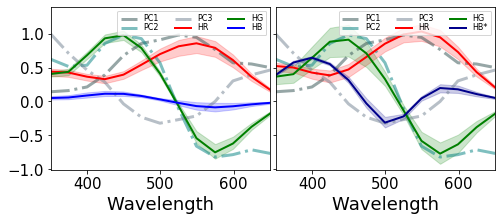

In [40]:
Colors_pca = ['darkslategray', 'teal', 'slategray']

fig = plt.figure(figsize=(12,3))
grid = plt.GridSpec(2, 6, wspace = 0.05 , hspace = 0.1)

p2 = fig.add_subplot(grid[:, :2])
p3 = fig.add_subplot(grid[:, 2:4])

p2.plot(L, h1_true,color=Colors_pca[0], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC1')
p2.plot(L, h2_true,color=Colors_pca[1], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC2')
p2.plot(L, h3_true,color=Colors_pca[2], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC3')
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='r', ax=p2, linewidth = 2, label='HR')
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='g', ax=p2, linewidth = 2, label='HG')
sns.lineplot(x = L_array_[1:], y = hb_learned_[1:], color='b', ax=p2, linewidth = 2, label='HB')
p2.set_xlim(350.1, 650)
p2.set_ylim(-1.01, 1.4)
p2.tick_params(labelsize=15)
p2.set_xlabel("Wavelength", fontsize='18')
p2.legend(fontsize='8',loc=1, ncol = 3, handleheight=0.2, labelspacing=0.006)

#--------------------------------------
p3.plot(L_2hc, h1_true_2hc,color=Colors_pca[0], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC1')
p3.plot(L_2hc, h2_true_2hc,color=Colors_pca[1], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC2')
p3.plot(L_2hc, h3_true_2hc,color=Colors_pca[2], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC3')
sns.lineplot(x = L_array_2hc_[1:], y = 1.2*hr_learned_2hc_[1:], color='r', ax=p3, linewidth = 2, label='HR')
sns.lineplot(x = L_array_2hc_[1:], y = 1.2*hg_learned_2hc_[1:], color='g', ax=p3, linewidth = 2, label='HG')
sns.lineplot(x = L_array_2hc_[1:], y = 1.4*hb_learned_2hc_[1:], color='darkblue', ax=p3, linewidth = 2, label='HB*')

p3.set_yticklabels([])
p3.set_xlim(350.1, 650)
p3.set_ylim(-1.01, 1.4)
p3.tick_params(labelsize=15)
p3.set_xlabel("Wavelength", fontsize='18')
p3.legend(fontsize='8',loc=1, ncol = 3, handleheight=0.2, labelspacing=0.007)

# plt.savefig("Plots/Trichro_Fit_pca+opsins.pdf")